### Please inform me possible mistakes => Taherzadehesam@gmail.com

In [1]:
# importing the modules 
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
from scipy.stats.distributions import chi2
import pandas as pd


In [2]:
# functions 
def tau(n, alpha):
    return -np.sqrt(n*scipy.stats.t.ppf(1 - (alpha/2),n-1)**2/(n-1+scipy.stats.t.ppf(1 -( alpha/2),n-1)**2)), np.sqrt((n*scipy.stats.t.ppf(alpha/2,n-1)**2)/(n-1+scipy.stats.t.ppf(alpha/2,n-1)**2))

# Chapter 3

### Question 3-4

In [3]:
A = np.matrix([1,1,1]).T
l = (45 + 27/60 + np.matrix([20,24,23])/3600).T
cl = np.matrix(np.diag([(6/3600)**2,(9/3600)**2,(3/3600)**2]))
p = np.linalg.inv(cl)
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcap is \n{xcap}")


the xcap is 
[[45.4562585]]


In [4]:
Cx = np.linalg.inv(A.T*p*A)
print(f"the variance is :\n{np.sqrt(Cx)*3600}")

the variance is :
[[2.57142857]]


### Question 3-5

In [5]:
l = np.matrix([1000.19,1000.4,1000.5,1000.28]).T
A = np.matrix([1,1,1,1]).T
cl = np.matrix(np.diag([12,13,14,15]))**2 * 1e-3
p = np.linalg.inv(cl)
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l

In [6]:
print(f"the xcap is \n{xcap}")

the xcap is 
[[1000.33388715]]


In [7]:
standarddeviation = np.linalg.inv(A.T*p*A);np.sqrt(standarddeviation)

matrix([[0.21125042]])

In [8]:
vcap = A*xcap - l
print(f"the vcap is \n{vcap}")

the vcap is 
[[ 0.14388715]
 [-0.06611285]
 [-0.16611285]
 [ 0.05388715]]


In [9]:
df = 3
secondaryvariancefactor = vcap.T * p * vcap / df
print(f"the secondaryvariancefactor is \n{secondaryvariancefactor}")

the secondaryvariancefactor is 
[[0.10777557]]


### Question 3-7

In [10]:
cl = np.matrix((np.sqrt(2)*0.1)**2*np.eye(8))
p = np.linalg.inv(cl)
l = np.matrix([25.42 + 98, 10.34, 98 + 35.20, -15.54, 21.32, 4.82, 98 + 31.02, -26.11 ]).T
A = np.matrix([[1,0,0,0],[-1,1,0,0],[0,0,0,1],[0,1,0,0],[-1,0,1,0],[0,1,-1,0],[0,0,-1,1],[0,1,0,-1]])
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcap is \n{xcap}")

print('-'*20)

standarddeviation = np.linalg.inv(A.T*p*A)
print(f"The Cx is  is \n{standarddeviation}")

print('-'*20)

vcap = A*xcap - l
print(f"the vcap is \n{vcap}")

print('-'*20)

df = 8 - 4 
secondaryvariancefactor = vcap.T * p * vcap / df
print(f"the secondaryvariancefactor is \n{secondaryvariancefactor}")

the xcap is 
[[ 62.034     ]
 [ 51.48866667]
 [ 42.85333333]
 [127.55733333]]
--------------------
The Cx is  is 
[[0.01066667 0.00533333 0.00666667 0.004     ]
 [0.00533333 0.00933333 0.00666667 0.00533333]
 [0.00666667 0.00666667 0.01333333 0.00666667]
 [0.004      0.00533333 0.00666667 0.01066667]]
--------------------
the vcap is 
[[-61.386     ]
 [-20.88533333]
 [ -5.64266667]
 [ 67.02866667]
 [-40.50066667]
 [  3.81533333]
 [-44.316     ]
 [-49.95866667]]
--------------------
the secondaryvariancefactor is 
[[185546.96233333]]


### Question 3-8

In [11]:
A = np.matrix([1,0,1,0,-1,1,0,1,0,1]).reshape(-1,2)
l = np.matrix([205, 112 + 101.60, 34, 52 + 108.05, 67 + 106.07]).T
xcap = np.linalg.inv(A.T*A)*A.T*l
print(f"the xcaps without considering the weights are \n{xcap}")
trcx = np.trace(np.linalg.inv(A.T*A))
print(f"the trace of Cx is {trcx}")

the xcaps without considering the weights are 
[[190.115]
 [185.745]]
the trace of Cx is 0.75


In [12]:
p1 = np.matrix(np.diag([1/3,1/3,1/1,1/1.5,1/2]))**2
xcap = np.linalg.inv(A.T*p1*A)*A.T*p1*l
print(f"the xcaps with considering the distance as weights are \n{xcap}")
trcx = np.trace(np.linalg.inv(A.T*p1*A))
print(f"the trace of Cx is {trcx}")

the xcaps with considering the distance as weights are 
[[158.35870317]
 [181.03841499]]
the trace of Cx is 2.7233429394812676


In [13]:
p2 = np.matrix(np.diag([105,112,34,52,67]))**2
xcap = np.linalg.inv(A.T*p2*A)*A.T*p2*l
print(f"the xcaps with considering the stations as weights are \n{xcap}")
trcx = np.trace(np.linalg.inv(A.T*p2*A))
print(f"the trace of Cx is {trcx}")

the xcaps with considering the stations as weights are 
[[206.52011007]
 [178.19231971]]
the trace of Cx is 0.00016126367137348323


In [14]:
p3 = np.matrix(np.diag([1/3.6,1/2.06,1/2.02,1/2.37,1/0.38]))**2
xcap = np.linalg.inv(A.T*p3*A)*A.T*p3*l
print(f"the xcaps with considering the distance as weights are \n{xcap}")
trcx = np.trace(np.linalg.inv(A.T*p3*A))
print(f"the trace of Cx is {trcx}")

the xcaps with considering the distance as weights are 
[[180.13310852]
 [174.12405051]]
the trace of Cx is 1.9572499903606244


### As it can be seen the quantity of the station as the weight parameter gives out the best result

### Question 3-10

In [15]:
t = np.arange(1,11)
A = np.zeros((10,3))
A[:,0] = 1
A[:,1] = t
A[:,2] = - 0.5 * t**2
l = np.matrix(np.array([[109.4,187.5,267.5,331.9,386.1,428.4,452.2,498.1,512.3,513.0]])).T
p = np.matrix(np.eye(10)/8)**2
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcaps are \n{xcap}")

the xcaps are 
[[16.40833333]
 [96.97128788]
 [ 9.40833333]]


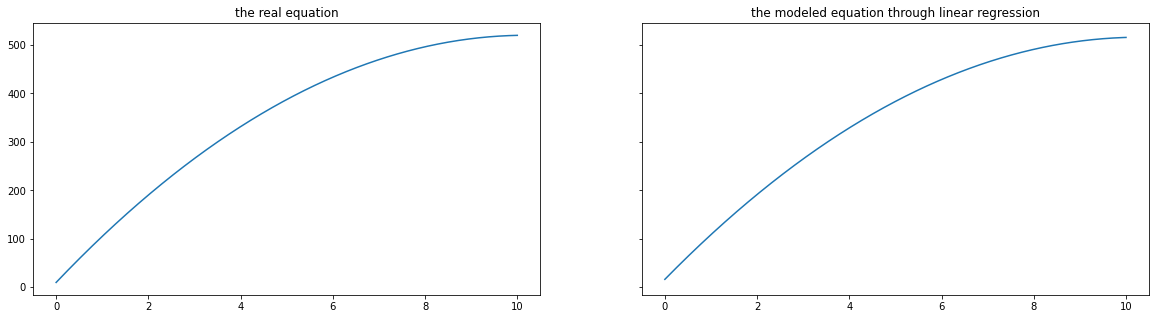

In [16]:
t = np.linspace(0,10,1000)
realeq = 10 + 100 * t - 0.5 *9.8 * t**2
eqcoeffcap = float(xcap[0]) + float(xcap [1])*t - 0.5 * float(xcap[2])* t**2
fig, ax =plt.subplots(1,2,figsize=(20,5),sharey =True )
ax[0].plot(t,realeq)
ax[0].set_title("the real equation")
ax[1].plot(t,eqcoeffcap)
ax[1].set_title("the modeled equation through linear regression")
plt.show()

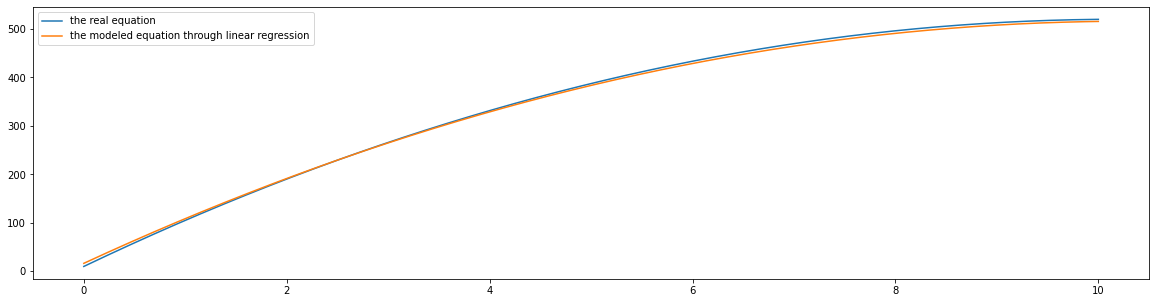

In [17]:
fig, ax =plt.subplots(figsize=(20,5))
ax.plot(t,realeq,label="the real equation")
ax.plot(t,eqcoeffcap,label="the modeled equation through linear regression")
plt.legend()
plt.show()

### Question 3-11

In [18]:
p = np.matrix(np.diag([1/181,1/94,1/142,1/176,1/135,1/99,1/138,1/140]))*1e-2
l = np.matrix([25.42 + 98, 10.34, 98 + 35.20, -15.54, 21.32, 4.82, 98 + 31.02, -26.11 ]).T
A = np.matrix([[1,0,0,0],[-1,1,0,0],[0,0,0,1],[0,1,0,0],[-1,0,1,0],[0,1,-1,0],[0,0,-1,1],[0,1,0,-1]])
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcap is \n{xcap}")

print('-'*20)

standarddeviation = np.linalg.inv(A.T*p*A)
print(f"The Cx is  is \n{standarddeviation}")

print('-'*20)

vcap = A*xcap - l
print(f"the vcap is \n{vcap}")

print('-'*20)

df = 8 - 4 
secondaryvariancefactor = vcap.T * p * vcap / df
print(f"the secondaryvariancefactor is \n{secondaryvariancefactor}")

the xcap is 
[[ 56.07824325]
 [ 54.94096354]
 [ 43.65429336]
 [129.16633161]]
--------------------
The Cx is  is 
[[8298.37910295 5081.70281736 5607.47254686 3589.6592054 ]
 [5081.70281736 7250.97177851 5756.48368527 4363.03385664]
 [5607.47254686 5756.48368527 9575.83621518 5156.33169356]
 [3589.6592054  4363.03385664 5156.33169356 7863.6282319 ]]
--------------------
the vcap is 
[[-67.34175675]
 [-11.47727971]
 [ -4.03366839]
 [ 70.48096354]
 [-33.74394989]
 [  6.46667018]
 [-43.50796175]
 [-48.11536808]]
--------------------
the secondaryvariancefactor is 
[[0.23476429]]


### Question 3-14

In [19]:
l = np.arange(-0.95,1.05,0.1)
A = np.matrix([l**n for n in range(20)]).T
l = np.matrix(l).T
xcap = np.linalg.inv(A.T*A) * A.T * l

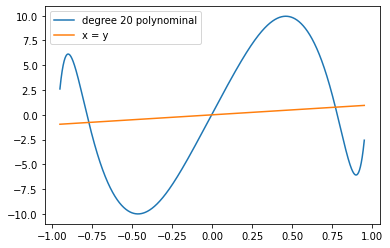

In [20]:
t = np.linspace(-0.95,0.95,200000)
eq = [float(xcap[i])*t**(i) for i in range(20)]
plt.plot(t,sum(eq),label="degree 20 polynominal")
plt.plot(t,t,label = "x = y")
plt.legend()
plt.show()

### Question 3-18

In [21]:
x = np.matrix([-0.0737212987684093,1.00017225045216]).T
l = np.matrix([451.211,344.368,1171.274,393.156,720.064,326.908]).T
true = np.matrix([451.215,344.373,1171.285,393.158,720.072,326.914]).T
A = np.zeros((6,2))
for i in range(100):
    A[:,0] = -1/x[1]
    A[:,1] = (x[0]-np.array(true)/(x[1]**2)).flatten()
    lcap = l - (true - x[0])/x[1]
    deltacap = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),lcap)
    if (np.abs(deltacap)<0.00001).all():
        print(f"after {i+1} iteration the x is :\n{x}")  
        break 
    x = x + deltacap

after 3 iteration the x is :
[[0.00128701]
 [1.0000083 ]]


### Question 3-19

In [22]:
xp,yp = sp.symbols("x_p y_p")
f = sp.Matrix([sp.sqrt((300 - xp)**2 + (300 - yp)**2),
               sp.sqrt((600 - xp)**2 + (250 - yp)**2),
               sp.sqrt((800 - xp)**2 + (400 - yp)**2)]).T
variables = sp.Matrix([xp,yp])
A = f.jacobian(variables)
p = sp.Matrix(sp.diag(1/0.05,1/0.05,1/0.05))
x0 = sp.Matrix([600,500])
l = sp.Matrix([360.50, 250.1, 223.5]).transpose()
for i in range(100):
    A = f.jacobian(variables)
    A = A.subs(((xp,x0[0]),(yp,x0[1]))).evalf()
    deltal = ((l - f.subs(((xp,x0[0]),(yp,x0[1]))).evalf()).evalf()).T
    deltacap = (A.T*p*A).inv()*A.T*p*deltal
    if (sp.matrix2numpy(deltacap) <np.matrix([0.01])).all():
        print(f"after {i} iteration the answer is = \n")
        print(sp.matrix2numpy(x0))
        break
    
    x0 = x0 + deltacap

after 1 iteration the answer is = 

[[600.032735937375]
 [500.013029723712]]


### Question 3-20

In [23]:
# initial symbols 
yp = sp.symbols("yp")
variables = sp.Matrix([yp])
f = sp.Matrix([[-(sp.atan((19.32-2)/(yp-2)) - sp.pi)],
              [sp.atan((19.32-2)/(yp-19.32))]])
# initial observations 
l = sp.Matrix([[np.radians(120),np.radians(57+40/60)]]).transpose()
y0 = sp.Matrix([29])
for i in range(100):
    A1 = (f.jacobian(variables).subs(yp,y0[0])).evalf()
    w1 = (l - f.subs(yp,y0[0])).evalf()
    deltacap = ((A1.T*A1).evalf().inv()* A1.T * w1).evalf()
    
    if (abs(sp.matrix2numpy(deltacap)) <np.matrix([0.001])).all() :
        print(f"after {i+1} iteration the answer is = \n")
        print(sp.matrix2numpy(y0))
        break
    
    y0 = (deltacap + y0).evalf()  

after 4 iteration the answer is = 

[[26.5496428411130]]


### Question 3-21

In [24]:
xb, yb, xc = sp.symbols("xb yb xc")
f = sp.Matrix([[sp.atan(yb/xb),-sp.atan(yb/xb)-sp.atan(yb/xb)+ sp.pi, sp.atan(yb / (xc - xb))]]).transpose()
cl = sp.Matrix(sp.diag(((5*sp.pi/180)**2), ((5*sp.pi/180)**2), ((5*sp.pi/180)**2)))
p = cl.inv()
l = sp.Matrix([[(59 + 59/60 + 58/3600)*sp.pi/180, (59 + 59/60 + 51/3600)*sp.pi/180, (59 + 59/60 + 54/3600)*sp.pi/180]]).transpose()
var = sp.Matrix([xb,yb,xc])
B = sp.eye(4)
x = sp.Matrix([[500,500*np.tan(np.radians(60)),1000]]).transpose() 

In [25]:
for i in range(2):
    A1 = f.jacobian(var)
    A1 = (A1.subs(((xb, x[0]), (yb, x[1]), (xc,x[2])))).evalf()
    w1 = (-l +f.subs(((xb, x[0]),(yb, x[1]),(xc,x[2])), dtype=float)).evalf()

    deltacap = ((A1.T*A1).evalf().inv()* A1.T * w1).evalf()
    
    if (sp.matrix2numpy(deltacap) <np.matrix([0.0000000001])).all():
        print(f"after {i+1} iteration the answer is = \n\n")
        print(sp.matrix2numpy(x))
        break
    x = x + deltacap

after 2 iteration the answer is = 


[[500.017375722331]
 [866.035332768627]
 [999.985106523716]]


### Question 3-23

In [26]:
angles = np.array(['185 22 14', '208 26 19', '205 13 51'])
leno = len(angles)
angles = [angles[i].split(" ") for i in range(leno)]
angles = np.array([float(angles[i][0])+float(angles[i][1])/60+float(angles[i][2])/3600 for i in range(leno)])

bearing  = [172.89277778 + 68.255750]

for i, j  in zip(range(leno),range(0,leno)):
    if bearing[i] < 180: 
        bearing.append( bearing[i]+180+angles[j])
    else :
        bearing.append( bearing[i]-180+angles[j])
bearing = np.array(bearing)
bearing1 = pd.DataFrame(bearing, columns=["Bearing"])
bearing= np.radians(bearing)
bearing1

,Bearing
0,241.148528
1,246.519083
2,274.957694
3,300.188528


In [27]:
xc, yc, xd, yd = sp.symbols("xc yc xd yd") 
var = sp.Matrix([xc, yc, xd, yd])
f = sp.Matrix([[sp.sqrt((8478.139-xc)**2 + (2483.826-yc)**2),
                sp.sqrt((xd-xc)**2 + (yd-yc)**2),
                sp.sqrt((xd-7709.336)**2 + (yd-2263.411)**2),
                sp.pi + sp.atan((8478.139)/(2483.826)),
                sp.pi +sp.atan((xc-8478.139)/(yc-2483.826)),
                sp.pi + sp.atan((xd-xc)/(yd-yc)),
                2*sp.pi + sp.atan((7709.336-xd)/(2263.411-yd))]]).transpose()
l = sp.Matrix([[281.832,271.3,274.1,bearing[0],bearing[1],bearing[2],bearing[3]]]).transpose()
cl = sp.Matrix(sp.diag((0.016)**2,(0.016)**2,(0.016)**2,(2/3600 * sp.pi/180)**2 ,(2*np.sqrt(2)/3600 * sp.pi/180)**2,(2*np.sqrt(3)/3600 * sp.pi/180)**2,(4/3600 * sp.pi/180)**2))
p = cl.inv()
x = sp.Matrix([[8231.289808403944 ,2347.8305852523913 ,-248.83441514632077 +8231.289808403944, -108.0977513123584+2347.8305852523913]]).transpose()
alter = ((xc,x[0]),(yc,x[1]),(xd,x[2]),(yd,x[3]))

In [28]:
for i in range(100):
    alter = ((xc,x[0]),(yc,x[1]),(xd,x[2]),(yd,x[3]))
    A1 = f.jacobian(var)
    A1 = (A1.subs(alter)).evalf()
    w1 = (l -f.subs(alter, dtype=float)).evalf()

    deltacap = ((A1.T*A1).evalf().inv()* A1.T * w1).evalf()
    
    if (abs((sp.matrix2numpy(deltacap))) <np.matrix([0.0001])).all():
        print(f"after {i+1} iteration the answer is = \n\n")
        print(sp.matrix2numpy(x))
        break
    x = x + deltacap

after 19 iteration the answer is = 


[[8244.82235789909]
 [2325.73164499101]
 [7983.26438644089]
 [2253.67541117574]]


# Chapter 4

### Question 2-4

In [29]:
df = 6 - 4 
B = np.matrix([[-1, 0, 1],
              [1, -1, 0]])
l = np.matrix([50,50.2,49.8]).T
w = B * l
vcap = -B.T*np.linalg.inv(B*B.T)*w
lcap = l + vcap
Vcap = np.prod(lcap)

In [30]:
print(f"The estimation of Volume is {Vcap} mm^3")

The estimation of Volume is 125000.0 mm^3


### Question 3-4

In [31]:
df = 3 - 1 
B = np.matrix([[1, 1, 1, 0, 0, 0],
              [0, 1, 0, 1, 1, 1]])
l = np.matrix([60 + 3/3600, 60 + 2/3600, 60 + 1/3600, 120 + 5/3600, 120 + 5/3600 , 60 + 1/3600]).T
c = np.matrix([180, 360]).T
w = B * l - c
vcap = -B.T*np.linalg.inv(B*B.T)*w
lcap = l + vcap

In [32]:
lcap

matrix([[ 60.00055556],
        [ 59.99944444],
        [ 60.        ],
        [120.00055556],
        [120.00055556],
        [ 59.99944444]])

### Question 4-4

In [33]:
B = np.matrix([[0,0,0,-1,1,-1,1,-1,1,0],[-1,1,1,-1,0,0,0,0,1,-1]])
w = np.matrix([-4/3600, 2/3600]).T
vcap = -B.T * np.linalg.inv(B * B.T) * w
p = np.eye(10)* (1 / 3600)**2
df = 2
secondaryvariancefactor = vcap.T * vcap / df

In [34]:
print(f"the secondaryvariancefactor is {secondaryvariancefactor}")

the secondaryvariancefactor is [[1.83256173e-07]]


### Question 4-5

In [35]:
l = (59 + 59/60 + np.matrix([58, 51, 54])/3600).T
B = np.matrix([[1,1,1]])
c = 180
w = B * l - c
cl = np.matrix(np.diag([5,5,5]))/3600
vcap = -cl * B.T * np.linalg.inv(B * cl * B.T) * w
l += vcap

In [36]:
l = np.radians(l);l

matrix([[1.04721533],
        [1.04718139],
        [1.04719594]])

### Question 4-6

In [37]:
df = 5 - 4
B = np.matrix([1, 1, -1])
l = np.matrix([30 + 15 / 60 + 15 / 3600, 20,50 + 15 / 60 + 18/3600 ]).T
w = B * l 
vcap = - B.T * np.linalg.inv(B * B.T) * w
l = l + vcap
theta = 70 + 1/3600 - l[1] - 30
print(f"Theta is {theta}")

Theta is [[20.]]


In [38]:
cl = np.matrix(np.eye(3))
clcap = cl - cl * B.T * np.linalg.inv(B*cl*B.T) * B * cl
Dthetaonx = np.matrix([-1, -1, 1])
sigma2theta = Dthetaonx * np.matrix(np.diag([clcap[1,1],1,1])) * Dthetaonx.T
print(f"The variance for theta is {sigma2theta} arcsec^2") 

The variance for theta is [[2.66666667]] arcsec^2


### Question 4-8

In [39]:
B = np.matrix([1, 1, 1])
l = np.matrix([60 + 2/60 , 60 + 1/60, 60]).T
w = B * l - 180
vcap = - B.T * np.linalg.inv(B * B.T) * w
l += vcap

In [40]:
print(f"The ABC is {l[0]}")

The ABC is [[60.01666667]]


### Question 4-9

##### A

In [41]:
df = 5 -3 
B = np.matrix([[1, 0, 0, -1],[0, -1, 1 ,0]])
l = np.matrix([2, 3 , 3.1, 1.94]).T
w = B * l 
vcap = - B.T * np.linalg.inv(B * B.T) * w
lcap = l + vcap
print(f"lcap is \n{lcap}")

print("-" * 25)

X1 = lcap[1]*lcap[0]
X2 = lcap[3]* 1

print(f"X1cap is {X1} \nX2cap is {X2}")

lcap is 
[[1.97]
 [3.05]
 [3.05]
 [1.97]]
-------------------------
X1cap is [[6.0085]] 
X2cap is [[1.97]]


In [42]:
sigma2X1 = 0.5**2 * lcap[1]**2 + 0.5**2 * lcap[0]**2 
sigma2X2 = 0.5**2 + 0.5**2 *lcap[2]**2

### Question 4-10

In [43]:
A = np.matrix([[1,0,0,0,0,0,0,1,1,0,0,0,180],
               [0,1,1,0,0,0,0,0,0,-1,1,0,180],
               [0,0,0,1,1,1,0,0,0,0,0,0,180],
               [-1,-1,0,0,0,0,0,0,0,0,0,1,0],
               [0,1,1,1,1,0,0,0,0,1,0,0,360]])

In [44]:
np.linalg.matrix_rank(A)

5

### Question 11 is the same as Question 3

### Question 4-12

In [3]:
l =np.matrix([[1.1,0.9,1,np.radians(60)]],dtype = float).T
counter = 1
for i in range(100):
    B = np.matrix([-2*l[0,0]+2*l[2,0]*np.cos(l[3,0]),
                    2*l[1,0],
                   -2*l[2,0]+2*l[0,0]*np.cos(l[3,0]),
                   -2*l[0,0]*l[2,0]*np.sin(l[3,0])])
    w = l[1]**2-l[0]**2-l[2]**2+2*l[0]*l[2]*np.cos(l[3])
    vcap = -B.T * np.linalg.inv(B*B.T) * w
    
    if np.all(np.abs(vcap)<0.001):
        print(f"after {i+1} iteration the lcap is \n {l}")
        break 
        
    l = l + vcap



after 3 iteration the lcap is 
 [[1.05957468]
 [0.96095372]
 [0.96969752]
 [0.98296672]]


In [8]:
print("The secondary variance factor is :")
print(float(vcap.T*vcap))

The secondary variance factor is :
1.3246441420844424e-12


In [9]:
cl = np.matrix(np.eye(4))
clcap = cl - cl * B.T*np.linalg.inv(B*cl*B.T)*B*cl
clcap

matrix([[ 0.86862997,  0.24192218, -0.09619545, -0.21524879],
        [ 0.24192218,  0.55449246,  0.17714704,  0.39638763],
        [-0.09619545,  0.17714704,  0.92956107, -0.15761551],
        [-0.21524879,  0.39638763, -0.15761551,  0.6473165 ]])

# Chapter 5

### Question 5-1

In [48]:
# Ax = b => x =A^+b
# usual way
A = np.matrix([1,1,1]).T
l = (45 + 27/60 + np.matrix([20,24,23])/3600).T
cl = np.matrix(np.diag([(6/3600)**2,(9/3600)**2,(3/3600)**2]))
p = np.linalg.inv(cl)
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcap is \n{xcap}")

the xcap is 
[[45.4562585]]


In [49]:
Aplus = np.linalg.pinv(A)
xcap = Aplus * l
xcap

matrix([[45.4562037]])

### Question 5-2

In [50]:
L = np.linalg.cholesky(p)
Ap = L.T * A
lp = L.T * l
np.linalg.pinv(Ap)*lp

matrix([[45.4562585]])

#### The next two questions are the same as two before 

# Chapter 6

### Question 6-1

In [4]:
a,b = 0.95,1.85
x = np.matrix([a,b]).T
cl =np.matrix(np.diag([0.01,0.01,0.04,0.04,0.01,0.01,0.04,0.04,0.01,0.01,0.04,0.04]))
p = np.linalg.inv(cl)
l = np.matrix([0,1,-2.1,1.1,1,0,1,2,1,1,-0.9,2.8]).T


In [5]:
for i in range(10000) :
    A = -np.matrix([[0,1],[-1,0],[-1,0],[0,-1],[-1,1],[-1,-1]])
    B = -np.matrix([[-a, b, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [-b, -a, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, -a, b, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, -b, -a, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, -a, b, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, -b, -a, 0, 1],])
    w = -np.matrix([[-2.1+b, 1.1 -a , 1 - a , 2 - b, -0.9 -a +b, 2.8-b-a ]]).T
    
    deltacap = -np.linalg.inv(A.T*np.linalg.inv(B*cl*B.T)*A)*A.T*np.linalg.inv(B*cl*B.T)*w
    
    vcap = -cl*B.T*np.linalg.inv(B*cl*B.T)*(A*deltacap+w)
    if abs(all(deltacap))<0.001 and abs(all(vcap)) < 0.001:
        print(f"a and b after {i} iter are = \n{a , b}")
        break
    a = a + float(deltacap[0])
    b = b + float(deltacap[1])
    l = l + vcap
    

a and b after 1 iter are = 
(1.0, 1.95)


### Question 6-2

In [53]:
a,b,c = 1,1,-1
l = np.matrix([1.1,-1,0.9,-2,2,1,2,-2,1,-1.1,1,0.9]).T
B = np.matrix(np.zeros((4,12)))
w = np.matrix(np.zeros((4,1)))
x = np.matrix([a,b,c]).T
f = 0

for i in range(100):
    A = l.reshape(4,3)
    for i,s in zip(range(4),range(0,12,3)):
        B[i,s] =  x[0]
        B[i,s+1]= x[1]
        B[i,s+2]= x[2]
        w[i,0] = x[0] * l[s] + x[1] * l[s+1] + x[2] * l[s+2] + 1
    
    deltacap = -np.linalg.inv(A.T*np.linalg.inv(B*B.T)*A)*A.T*np.linalg.inv(B*B.T)*w
    vcap = -B.T*np.linalg.inv(B*B.T)*(A*deltacap+w)
    f += 1 
    if abs(all(deltacap))<0.001 and abs(all(vcap)) < 0.001:
        print(f"answer after {f} iter is = \n{x}")
        break

    x = x + deltacap
    l = l + vcap

answer after 8 iter is = 
[[ 0.23013566]
 [ 0.23492066]
 [-1.05022686]]


### Question 6-3

In [54]:
l = np.matrix([1,2,2,3,3,3.5]).T
x = np.matrix([4])
B = np.matrix(np.zeros((3,6)))
w = np.matrix(np.zeros((3,1)))
f = 0
for i in range(100):
    A = np.matrix([-l[0,0],-l[2,0],-l[4,0]]).T
    for j,s in zip(range(3),range(0,6,2)):
        B[j,s] = - x[0]
        B[j,s+1] = 2 * l[s+1]
        w[j,0] = l[s+1]**2-x[0]*l[s]
        
    deltacap = -np.linalg.inv(A.T*np.linalg.inv(B*B.T)*A)*A.T*np.linalg.inv(B*B.T)*w
    vcap = -B.T*np.linalg.inv(B*B.T)*(A*deltacap+w)

    f += 1 
    if all(abs(deltacap<0.001)) and all(abs(vcap<0.001)):
        print(f"answer after {f} iter")
        print(f"x is = {x}")
        break
        
    x = x + deltacap
    l = l + vcap

answer after 3 iter
x is = [[4.20376442]]


### Question 6-5

In [6]:
w,phi,k = sp.symbols("w phi kappa")
mw = sp.Matrix([[1,0,0],[0,sp.cos(w),sp.sin(w)],[0,-sp.sin(w),sp.cos(w)]])
mphi = sp.Matrix([[sp.cos(phi),0,-sp.sin(phi)],[0,1,0],[sp.sin(phi),0,sp.cos(phi)]])
mk = sp.Matrix([[sp.cos(k),sp.sin(k),0],[-sp.sin(k),sp.cos(k),0],[0,0,1]])

m = mw * mphi * mk

l = sp.Matrix([[1327.038,6533.705,611.579,
              2071.364,6434.718,635.397,
              474.825,6397.219,617.924,
              1231.048,5468.429,646.526,
              2111.601,5434.699,650.334,
              261.971,5457.467,632.278,
              17.818,-14.218,
              9.211,-87.813,
              3.461,69.421,
              -88.324,-6.420,
              -90.178,-94.091,
              -90.520,90.251]]).transpose()
x = np.matrix([1163,6350,2184,np.radians(0.55),np.radians(0.09),np.radians(89.24)]).T
m0 = np.matrix(sp.matrix2numpy(m.subs(((w,float(x[3])),(phi,float(x[4])),(k,float(x[5]))))),dtype=np.float64)

A = np.zeros((12,6))
B = np.zeros((12,30))
xo,yo,zo = sp.symbols("xo yo zo")
x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6 = sp.symbols("x1 x2 x3 x4 x5 x6 y1 y2 y3 y4 y5 y6")
X1,X2,X3,X4,X5,X6,Y1,Y2,Y3,Y4,Y5,Y6,Z1,Z2,Z3,Z4,Z5,Z6 = sp.symbols("X1 X2 X3 X4 X5 X6 Y1 Y2 Y3 Y4 Y5 Y6 Z1 Z2 Z3 Z4 Z5 Z6")

XS = [X1,X2,X3,X4,X5,X6]
YS = [Y1,Y2,Y3,Y4,Y5,Y6]
ZS = [Z1,Z2,Z3,Z4,Z5,Z6]

xs = [x1,x2,x3,x4,x5,x6]
ys = [y1,y2,y3,y4,y5,y6]

f = [[xs[count]+150*(m[0,0]*(XS[count]-xo)+m[0,1]*(YS[count]-yo)+m[0,2]*(Z1-zo))/(m[2,0]*(XS[count]-xo)+m[2,1]*(YS[count]-yo)+m[2,2]*(ZS[count]-zo)),
     ys[count]+150*(m[1,0]*(XS[count]-xo)+m[1,1]*(YS[count]-yo)+m[1,2]*(Z1-zo))/((m[2,0]*(XS[count]-xo)+m[2,1]*(YS[count]-yo)+m[2,2]*(ZS[count]-zo)))] for count in range(6)]

flatten = lambda t: [item for sublist in t for item in sublist]
f = flatten(f)
f = sp.Matrix(f)
var = sp.Matrix([xo,yo,zo,w,phi,k])
obser = sp.Matrix([X1,X2,X3,X4,X5,X6,Y1,Y2,Y3,Y4,Y5,Y6,Z1,Z2,Z3,Z4,Z5,Z6,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6])

A = f.jacobian(var)
B = f.jacobian(obser)

x0 = sp.Matrix([1163,6350,2184,np.radians(0.55),np.radians(0.09),np.radians(89.24)])
count = 1

for i in range(100):
    A0 = f.jacobian(var)
    B0 = f.jacobian(obser)
    X = l[:17:3]
    Y = l[1:18:3]
    Z = l[2:19:3]
    x = l[18::2]
    y = l[19::2]
    lene = len(X)
    Xalt = tuple([(XS[i],X[i]) for i in range(lene)])
    Yalt = tuple([(YS[i],Y[i]) for i in range(lene)])
    Zalt = tuple([(ZS[i],Z[i]) for i in range(lene)])
    xalt = tuple([(xs[i],x[i]) for i in range(lene)])
    yalt = tuple([(ys[i],y[i]) for i in range(lene)])
    variables = ((xo,x0[0]),(yo,x0[1]),(zo,x0[2]),(w,x0[3]),(phi,x0[4]),(k,x0[5]))
    alternations = Xalt + Yalt + Zalt + xalt + yalt + variables
    w0= f.subs(alternations).evalf()
    A0 = A0.subs(alternations).evalf()
    B0 = B0.subs(alternations).evalf()
    deltacap =-((((A0.transpose()*(B0*B0.transpose()).inv())*A0).inv()).evalf()*A0.transpose()*((B0*B0.transpose())).evalf().inv()*w0).evalf()
    vcap =-(B0.T*(B0*B0.transpose()).evalf().inv()*(A0*deltacap+w0)).evalf()
    if (abs(sp.matrix2numpy(deltacap)) <np.matrix([0.2])).all():
        print(f"after {i} iteration the answer is = \n\n")
        print(sp.matrix2numpy(x0))
        print(f"with deltacap = \n\n")
        print(sp.matrix2numpy(deltacap))
        break


    x0 = x0 + deltacap
    l = l + vcap

after 2 iteration the answer is = 


[[1161.75769354787]
 [6350.87611426636]
 [2147.55536965324]
 [-0.0110541113979770]
 [-0.00145130108511726]
 [1.55754377809177]]
with deltacap = 


[[0.131695885265158]
 [0.199743613079280]
 [0.0218989140618928]
 [3.06585355347162e-5]
 [6.98198869013528e-5]
 [-1.29847278461880e-5]]


### Couldnt achieve more percise answers ( angles are in radians)

### Question 6-6

In [34]:
a1,a2,a3,b1,b2,b3,l4,l5,xa,xb,ya,yb = sp.symbols("a_1 a_2 a_3 b_1 b_2 b_3 l_4 l_5 x_a x_b y_a y_b")
p = 100
f = sp.Matrix([[p * xb - b1 * yb,
                p * xa - a1 * ya,
                p * (l4 - xb) - b2* yb,
                p * (l4 - xa) - a2* ya,
                p * (l4 + l5 - xb) - b3* yb,
                p * (l4 + l5 - xa) - a3 * ya]]).transpose()

variables = sp.Matrix([xa,xb,ya,yb])
obser = sp.Matrix([a1,a2,a3,b1,b2,b3,l4,l5])
x0 = sp.Matrix([[6980.19801980198, 7004.21940928270,49504.9504950495, 42194.0928270042]]).transpose()

l = sp.Matrix([[14.1,6.1,22.1,16.6,7.1,26.3,10000,8000]]).transpose()
cl = sp.Matrix(np.diag([0.1,0.1,0.1,0.1,0.1,0.1,5e-05,5e-05])**2)
p = cl.inv()

A = f.jacobian(variables)
B = f.jacobian(obser)

for i in range(100):
    altsvars = tuple([(variables[i],x0[i]) for i in range(4)])
    altobser = tuple([(obser[i],l[i]) for i in range(8)])
    alts = altsvars + altobser
    A0 = A.subs(alts)
    B0 = B.subs(alts)
    w0 = f.subs(alts)
    
    deltacap = -((((A0.transpose() * (B0 * cl * B0.transpose()).inv()) * A0).inv()).evalf() * A0.transpose() * ((B0 * cl * B0.transpose())).evalf().inv() * w0).evalf()
    vcap = -(cl * B0.T * (B0 * cl * B0.transpose()).evalf().inv() * (A0*deltacap+w0)).evalf()
    
    if (abs(sp.matrix2numpy(deltacap)) <np.matrix([0.001])).all() and (abs(sp.matrix2numpy(vcap)) <np.matrix([0.001])).all():
        print(f"after {i} iteration the answer is = \n\n")
        print(sp.matrix2numpy(x0))
        print(f"with deltacap = \n\n")
        print(sp.matrix2numpy(deltacap))
        break
    
    x0 = x0 + deltacap
    l = l + vcap
    

after 2 iteration the answer is = 


[[6996.75871936101]
 [6983.17400938683]
 [49714.3534887728]
 [41967.1307847590]]
with deltacap = 


[[1.40727928858205e-12]
 [-5.58657068190945e-13]
 [3.08351072609426e-12]
 [-1.08124312213680e-11]]


In [15]:
# initial values 
sp.solve((100 * xb - 16.6 * yb,100 * xa - 14.1 * ya,100 * (10000 - xb) - 7.1* yb,p * (10000 - xa) - 6.1* ya),(xa,xb,ya,yb))

{x_b: 7004.21940928270,
 y_b: 42194.0928270042,
 x_a: 6980.19801980198,
 y_a: 49504.9504950495}

### Question 6-7

In [56]:
x, y, r = sp.symbols("x y r")
l11, l12, l21, l22, l31, l32, l41, l42 = sp.symbols("l11 l12 l21 l22 l31 l32 l41 l42")
var = sp.Matrix([x, y, r])
obser = sp.Matrix([l11, l12, l21, l22, l31, l32, l41, l42])
f = sp.Matrix([[r - sp.sqrt((l11 - x) ** 2 + (l12 - y) ** 2),
                r - sp.sqrt((l21 - x) ** 2 + (l22 - y) ** 2),
                r - sp.sqrt((l31 - x) ** 2 + (l32 - y) ** 2),
                r - sp.sqrt((l41 - x) ** 2 + (l42 - y) ** 2)]]).transpose()
l = sp.Matrix([[4, 4, 1, 4, 4, 2, 3, 1]]).transpose()
x0 = sp.Matrix([2.5,3,np.sqrt(5)])
for i in range(100):
    alter = tuple([(obser[i], l[i]) for i in range(8)]) + ((x, x0[0]), (y, x0[1]), (r, x0[2]))
    A = f.jacobian(var).subs(alter).evalf()
    B = f.jacobian(obser).subs(alter).evalf()
    w = f.subs(alter)
    deltacap = -(((((A.transpose() * (
                B * B.transpose()).inv()).evalf() * A).evalf()).inv()).evalf() * A.transpose()* (
                (B * B.transpose())).evalf().inv() * w).evalf()
    vcap = (-B.T * (B * B.transpose()).evalf().inv() * (A * deltacap + w)).evalf()
    if (abs(sp.matrix2numpy(deltacap)) < np.matrix([0.01])).all():
        print(f"after {i+1} iteration the answer is = \n\n")
        print(pd.DataFrame(sp.matrix2numpy(x0)))
        break
    x0 = (x0 + deltacap).evalf()
    l = l + vcap

after 2 iteration the answer is = 


                  0
0  2.45250330986081
1  2.86163883027667
2  1.86585947933058


In [57]:
#initial values for r x and y
sp.solve((r ** 2 - (4 - x) ** 2 + (4 - y) ** 2,r ** 2 - (1 - x) ** 2 + (4 - y) ** 2,
         r ** 2 - (4 - x) ** 2 + (2 - y) ** 2),(r,x,y))


[(-sqrt(5)/2, 5/2, 3), (sqrt(5)/2, 5/2, 3)]

# Chapter 7

### Question 7-1 with constraint

In [59]:
l = np.matrix([10.1,5.1,4]).T
x = np.matrix([10.1,4,2]).T 
w1 = np.matrix(np.zeros((3,1)))
f = 0
for i in range(10):
    A1 = np.matrix([[1, 0, 0],
                  [0, x[1]/np.sqrt(x[1]**2+(x[2]-5)**2),(x[2]-5)/np.sqrt(x[1]**2+(x[2]-5)**2)],
                  [0, x[1]/np.sqrt(x[1]**2+(x[2]-2)**2),(x[2]-2)/np.sqrt(x[1]**2+(x[2]-2)**2)]],dtype=float)
    w1[0,0] = x[0]
    w1[1,0] = np.sqrt(x[1]**2+(x[2]-5)**2)
    w1[2,0] = np.sqrt(x[1]**2+(x[2]-2)**2)
    w1 = w1 - l
    x = np.array([list(map(float,x))]).T
    A2 = np.matrix([x[2],-5,x[0]],dtype=float)
    w2 = np.matrix([x[0]*x[2]-5*x[1]])
    deltacap1 = -np.linalg.inv(A1.T*A1)*A1.T*w1
    deltacap = deltacap1 - (np.linalg.inv(A1.T*A1)*A2.T*np.linalg.inv(A2*np.linalg.inv(A1.T*A1)*A2.T)*(w2+A2*deltacap1))
    vcap = A1 * deltacap + w1
    

    if (abs(deltacap)<0.00001).all() and (abs(vcap)<0.00001).all():
        print(f"answer after {i+1} iter")
        print(f"x is = \n{x}") , 
        break
        
    x = x + deltacap
    l = l + vcap

answer after 3 iter
x is = 
[[10.10826005]
 [ 4.03496525]
 [ 1.99587527]]


### Question 7-2 (Mentioned to do it through Non-linear parametric model)

In [60]:
# initial symbols 
yp = sp.symbols("yp")
variables = sp.Matrix([yp])
# constraint ===> xc = xp 
f = sp.Matrix([[-(sp.atan((19.32-2)/(yp-2)) - sp.pi)],
              [sp.atan((19.32-2)/(yp-19.32))]])
# initial observations 
l = sp.Matrix([[np.radians(120),np.radians(57+40/60)]]).transpose()
y0 = sp.Matrix([29])
#Three given coordinates => coordination system has no undefined parameter hence no rank defect

In [61]:
count= 0
for i in range(100):
    A1 = (f.jacobian(variables).subs(yp,y0[0])).evalf()
    w1 = (l - f.subs(yp,y0[0])).evalf()
    deltacap = ((A1.T*A1).evalf().inv()* A1.T * w1).evalf()
    
    if (abs(sp.matrix2numpy(deltacap)) <np.matrix([0.001])).all() :
        print(f"after {i+1} iteration the answer is = \n")
        print(sp.matrix2numpy(y0))
        break
    
    y0 = (deltacap + y0).evalf()  

after 4 iteration the answer is = 

[[26.5496428411130]]


### Question 7-4 

In [62]:
l = np.matrix([7.07,7.08,10,10.02,np.radians(30)]).T
# one variable is reduced because of constraint
x = np.matrix([5,5,8]).T
w1 = np.matrix(np.zeros((5,1)))
cl = np.matrix(np.diag([0.01**2,0.01**2,0.01**2,0.01**2,(np.radians(0.01))**2]))
p = np.linalg.inv(cl)
for i in range(100):    
    A1 = np.matrix([[x[0]/np.sqrt(x[0]**2+(x[1]-10)**2),(x[1]-10)/np.sqrt(x[0]**2+(x[1]-10)**2),0],
                    [x[0]/np.sqrt(x[0]**2+(x[1])**2),(x[1])/np.sqrt(x[0]**2+(x[1])**2),0],
                    [0,(x[1]-10)/np.sqrt(x[2]**2+(x[1]-10)**2),x[2]/np.sqrt(x[2]**2+(x[1]-10)**2)],
                    [0,x[1]/np.sqrt(x[2]**2+(x[1])**2),x[2]/np.sqrt(x[2]**2+(x[1])**2)],
                    [0,x[2]/(x[2]**2+x[1]**2),-x[1]/(x[2]**2+x[1]**2)]],dtype = np.float64)
    w1[0,0] = np.sqrt(x[0]**2+(x[1]-10)**2)
    w1[1,0] = np.sqrt(x[0]**2+(x[1])**2)
    w1[2,0] = np.sqrt(x[2]**2+(x[1]-10)**2)
    w1[3,0] = np.sqrt(x[2]**2+x[1]**2)
    w1[4,0] = np.arctan(x[1]/x[2])
    w1 = l - w1
    deltacap = np.linalg.inv(A1.T * p * A1) * A1.T * p * w1
    
    
    if all(abs(deltacap)<0.001):
        print(f"answer after {i+1} iter")
        print(f"x is = \n{x}"), 
        break
        
    x = x + deltacap


answer after 3 iter
x is = 
[[5.00557755]
 [5.00799703]
 [8.67376594]]


# Chapter 8

### Question 8-1

In [63]:
# observations 
l = np.matrix([7.07,7.08,10,10.02,np.radians(30)]).T
cl = np.matrix(np.diag([0.01**2,0.01**2,0.01**2,0.01**2,(np.radians(0.01))**2]))
p = np.linalg.inv(cl)

# weighted parameters 
lx = np.matrix([5,5,8.7]).T
Clx = np.matrix(np.diag([0.2**2,0.2**2,0.2**2]))
px = np.linalg.inv(Clx)
H = np.matrix(np.diag([1,1,1]))

# initial values
x = np.matrix([5,5,8]).T
w1 = np.matrix(np.zeros((5,1)))

for j in range(1000):
    A1 = np.matrix([[x[0]/np.sqrt(x[0]**2+(x[1]-10)**2),(x[1]-10)/np.sqrt(x[0]**2+(x[1]-10)**2),0],
                    [x[0]/np.sqrt(x[0]**2+(x[1])**2),(x[1])/np.sqrt(x[0]**2+(x[1])**2),0],
                    [0,(x[1]-10)/np.sqrt(x[2]**2+(x[1]-10)**2),x[2]/np.sqrt(x[2]**2+(x[1]-10)**2)],
                    [0,x[1]/np.sqrt(x[2]**2+(x[1])**2),x[2]/np.sqrt(x[2]**2+(x[1])**2)],
                    [0,x[2]/(x[2]**2+x[1]**2),-x[1]/(x[2]**2+x[1]**2)]],dtype = np.float64)
    B1 = -np.matrix(np.eye(5))
    w1[0,0] = np.sqrt(x[0]**2+(x[1]-10)**2)
    w1[1,0] = np.sqrt(x[0]**2+(x[1])**2)
    w1[2,0] = np.sqrt(x[2]**2+(x[1]-10)**2)
    w1[3,0] = np.sqrt(x[2]**2+x[1]**2)
    w1[4,0] = np.arctan(x[1]/x[2])
    w1 = w1 - l
    w2 = +H * lx  - x
    deltacap = -np.linalg.inv(A1.T*np.linalg.inv(B1*cl*B1.T)*A1 + H.T * px * H ) * (A1.T * np.linalg.inv(B1 * p * B1.T) * w1 - H.T * px * w2)
    vcap1 = -cl * B1.T * np.linalg.inv(B1*cl*B1.T) * (A1*deltacap + w1)
    vcap2 = H *deltacap - w2 
    
    if all(abs(deltacap)<0.001) and all(abs(vcap1)<0.001) and all(abs(vcap2)<0.001) :
        print(f"answer after {j+1} iter")
        print(f"x is = \n{x} "), 
        break
        
    x = x + deltacap
    l = l + vcap1
    lx = lx + vcap2
    
    

answer after 2 iter
x is = 
[[5.        ]
 [5.00051188]
 [8.00086732]] 


### Question 8-2

In [64]:
xa, ya, xb, yb, xp, yp = sp.symbols("xa ya xb yb xp yp")
f1 = sp.atan((xp - xb) / (yb - ya)) - sp.atan(((xp - xa) / yp - ya))
f3 = sp.atan((xa - xp) / (ya - yp)) - sp.atan((xb - xp) / (yb - yp))
f2 = sp.atan((xp - xb) / (yp - yb)) - sp.atan((xa - xb) / (ya - yb))
f4 = sp.sqrt((xa - xb) ** 2 + (ya - yb) ** 2)
f = sp.Matrix([f1, f2, f3, f4])
var = sp.Matrix([xa, ya, xb, yb, xp, yp])

# observations
l = sp.Matrix([[(60 + 1 / 3600) * sp.pi / 180, (45 + 20 / 3600) * sp.pi / 180, (sp.pi / 180) * (75 + 6 / 3600), 448.330]],dtype=float).evalf().transpose()
cl = sp.diag(((sp.pi / 180) * (10 / 3600)) ** 2, (10 * sp.pi / 180 * 3600) ** 2, (10 * sp.pi / 180 * 3600) ** 2,0.002 ** 2, dtype=float).evalf()
B1 = -sp.eye(4)
p = cl.inv()

# weighted parameters
H = sp.eye(6)
lx = sp.Matrix([[1000, 1000, 1458.253, 879.462, 1101.177, 648.181]], dtype=float).transpose()
clx = sp.diag(3.132 * 10 ** -5, 1.642 * 10 ** -5, 1.212 * 10 ** -4, 1.139 * 10 ** -4, 3.132 * 10 ** -1,2.040 * 10 ** -1, dtype=float)
x = lx 
px = clx.inv()
for i in range(100):
    A1 = f.jacobian(var)
    A1 = A1.subs(((xa, lx[0]), (ya, lx[1]), (xb, lx[2]), (yb, lx[3]), (xp, lx[4]), (yp, lx[5]))).evalf()
    w1 = -l +sp.Matrix([f1, f2, f3, f4]).subs(((xa, lx[0]), (ya, lx[1]), (xb, lx[2]), (yb, lx[3]), (xp, lx[4]), (yp, lx[5])), dtype=float).evalf()
    w2 = (H * lx - x).evalf()

    deltacap = ((A1.transpose() * p * A1 + H.transpose() * clx * H).inv()) .evalf()* (-A1.transpose() * p * w1 + H.transpose() * px * w2).evalf()  # error is in here (A1.T*cwi*A1+H.T*px*H)
    vcap1 = (A1 * deltacap + w1).evalf()
    vcap2 = (H * deltacap - w2).evalf()
    if (sp.matrix2numpy(deltacap) <np.matrix([0.01])).all():
        print(f"after {i} iteration the answer is = \n\n")
        print(pd.DataFrame(sp.matrix2numpy(x)))
        break
    x = x + deltacap
    lx = lx + vcap2
    l = l +vcap1


after 6 iteration the answer is = 


                  0
0  952.350294084675
1  1275.90237897200
2  849.883590211389
3  839.439038128649
4  1101.41718767880
5  648.181000007745


### Question 8-3

In [65]:
l = np.matrix([10.1,5.1,4]).T
x = np.matrix([10.1,4,2]).T + 0.05
B1 = -np.matrix(np.eye((3)))
w1 = np.matrix(np.zeros((3,1)))
f = 0
lx = np.matrix([10,4,2]).T
cl = np.matrix(np.eye(3))
p = np.linalg.inv(cl)
clx = 100*np.matrix(np.eye(3))
px = np.linalg.inv(clx)
H = np.matrix(np.eye(3))
for _ in range(100):
    A1 = np.matrix([[1, 0, 0],
                  [0, x[1]/np.sqrt(x[1]**2+(x[2]-5)**2), (x[2]-5)/np.sqrt(x[1]**2+(x[2]-5)**2)],
                  [0, x[1]/np.sqrt(x[1]**2+(x[2]-2)**2),(x[2]-2)/np.sqrt(x[1]**2+(x[2]-2)**2)]],dtype=float)
    w1[0,0] = -l[0] + np.sqrt(x[0]**2)
    w1[1,0] = -l[1] + np.sqrt(x[1]**2+(x[2]-5)**2)
    w1[2,0] = -l[2] + np.sqrt(x[1]**2+(x[2]-2)**2)
    w2 = H * lx - x
    deltacap = -np.linalg.inv(A1.T*np.linalg.inv(B1*cl*B1.T)*A1 + H.T * px * H ) * (A1.T * np.linalg.inv(B1 * p * B1.T) * w1 - H.T * px * w2)
    vcap1 = -cl * B1.T * np.linalg.inv(B1*cl*B1.T) * (A1*deltacap + w1)
    vcap2 = H *deltacap - w2 

    f += 1 
    if (abs(deltacap)<0.001).all() and (abs(vcap1)<0.001).all() and (abs(vcap2)<0.001).all():
        print(f"answer after {f} iter")
        print(f"x is = \n{x}") , 
        break
        
    x = x + deltacap
    l = l + vcap1
    lx = lx + vcap2
    

answer after 3 iter
x is = 
[[10.0990099 ]
 [ 3.99895226]
 [ 1.83915311]]


### Question 8-4

In [66]:
xb, yb = sp.symbols("xb yb")
f = sp.Matrix([[sp.atan(yb/xb),-sp.atan(yb/xb)-sp.atan(yb/xb)+ sp.pi, sp.atan(yb / (999.985106523716 - xb))]]).transpose()
# xc = 999.985106523716  from 3-21
H = sp.Matrix([[1,0],[0,1]])
clx = sp.Matrix([[25,0],[0,25]])
cl = sp.Matrix(sp.diag(((5*sp.pi/180)**2), ((5*sp.pi/180)**2), ((5*sp.pi/180)**2)))
p = cl.inv()
px = clx.inv()
l = sp.Matrix([[(59 + 59/60 + 58/3600)*sp.pi/180, (59 + 59/60 + 51/3600)*sp.pi/180, (59 + 59/60 + 54/3600)*sp.pi/180]]).transpose()
lx = sp.Matrix([[500,866]]).transpose()
var = sp.Matrix([xb,yb])
B = sp.eye(4)
x = sp.Matrix([[500,500*np.tan(np.radians(60))]]).transpose() 

In [67]:
for i in range(2):
    A1 = f.jacobian(var)
    A1 = (A1.subs(((xb, x[0]),(yb, x[1])))).evalf()
    w1 = (-l +f.subs(((xb, x[0]),(yb, x[1])), dtype=float)).evalf()
    w2 = H * lx - x

    deltacap = ((A1.transpose() * p * A1 + H.transpose() * clx * H).inv()) .evalf()* (-A1.transpose() * p * w1 + H.transpose() * px * w2).evalf()  
    vcap1 = (A1 * deltacap + w1).evalf()
    vcap2 = (H * deltacap - w2).evalf()
    if (sp.matrix2numpy(deltacap) <np.matrix([0.0000000001])).all() and (sp.matrix2numpy(vcap1) <np.matrix([0.0000000001])).all() and (sp.matrix2numpy(vcap2) <np.matrix([0.0000000001])).all():
        print(f"after {i+1} iteration the answer is = \n\n")
        print(pd.DataFrame(sp.matrix2numpy(x)))
        break
    x = x + deltacap
    lx = lx + vcap2
    l = l +vcap1


after 2 iteration the answer is = 


                  0
0  499.999999455800
1  866.025363232150


### Question 8-5

In [68]:
# observations 
l = np.matrix([1.1,0.9,1,np.radians(60)]).T
Ql = np.matrix(np.diag([1,1,1,np.radians(1)]))

# weighted parameters 
lx = np.matrix([np.radians(60)]).T
Clx = np.matrix(np.diag([10]))
px = np.linalg.inv(Clx)
H = np.matrix([1])

# initial values
x = np.matrix([np.radians(60)]).T
w1 = np.matrix(np.zeros((2,1)))
B1 = np.matrix(np.zeros((2,4)))
A1 = np.matrix(np.zeros((2,1)))

for j in range(100):
    A1[0,0] = np.cos(x[0])
    A1[1,0] = l[0]*np.cos(x[0]) + l[2]*np.cos(x[0]+l[3])
    B1[0,1] = l[2]*np.sin(l[3])/l[1]**2
    B1[0,2] = -np.sin(l[3])/l[1]
    B1[0,3] = -l[2]*np.cos(l[3])/l[1]
    B1[1,0] = np.sin(x[0])
    B1[1,2] = np.sin(x[0]+l[3])
    B1[1,3] = l[2] * np.cos(x[0]+l[3])
    cw = -B1 * Ql * B1.T
    cwi = np.linalg.inv(cw)
    w1[0,0] = np.sin(x[0])-l[2]*np.sin(l[2])/l[0]
    w1[1,0] = l[0]*np.sin(x[0]) + l[2]*np.cos(x[0]+l[3])
    w2 = H * lx -x[0]
    deltacap = -np.linalg.inv(A1.T*cwi*A1+H.T*np.linalg.inv(px)*H)*(A1.T*cwi*w1-H.T*px*w2)
    vcap1 = -Ql*B1.T*np.linalg.inv(B1*Ql*B1.T)*(A1*deltacap+w1)
    vcap2 = H* deltacap - w2
    
    if all(abs(deltacap)<0.01) :
        print(f"answer after {j+1} iter")
        print(f"x is = \n{x} rad equal to {np.degrees(x)} degrees"), 
        break
        
    x = x + deltacap
    
   
 


answer after 4 iter
x is = 
[[1.08257206]] rad equal to [[62.02681027]] degrees


# Chapter 12

### Question 12-1

In [69]:
obser = np.array([9.3,6.6,7.9,6.8,
                  6.1,5.9,6.1,7.8,
                  7.2,8,7.1,4.9,
                  5.7,5.2,6.9,6.2,
                  10.1,9.7,4.1,6.2])
obser = np.sort(obser)
count = round((max(obser) - min(obser))/((0.5))) + 1
obser
obser1 = [4.1,  4.9,  5.2,  5.7,  5.9]
obser2 =[6.1,  6.1,  6.2,  6.2,  6.6,  6.8,
        6.9,  7.1,  7.2]
obser3 =[ 7.8,  7.9,  8. ,  9.3,  9.7, 10.1]
obser4 = [obser1,obser2,obser3]
y = [len(obser1),len(obser2),len(obser3)]

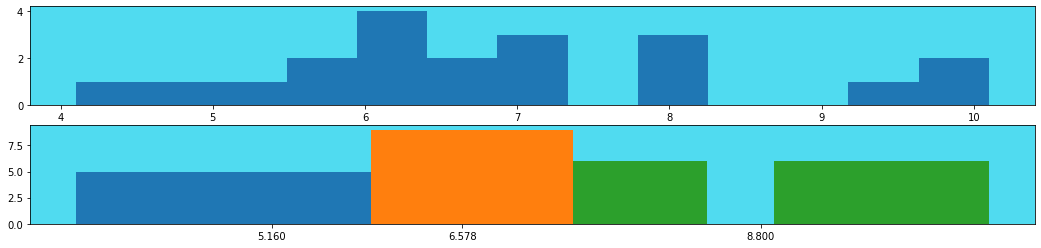

In [70]:
fig, ax = plt.subplots(2,1,figsize=(18,4),subplot_kw={'facecolor':'#50dbf0'})
n,bins,_ = ax[0].hist(obser,count)
ax[1].bar(obser1,len(obser1),width=0.8)
ax[1].bar(obser2,len(obser2),width=0.4)
ax[1].bar(obser3,len(obser3),width=0.8)
ax[1].set_xticks([np.mean(obser1),np.mean(obser2),np.mean(obser3)])
plt.show()
# histogram with 12 bins 
# histogram with 3 bins 

In [71]:
# Example for one of the bins 
s = np.std(obser)
El = np.mean(obser)
print(El)
print(s**2)

6.890000000000001
2.3259000000000003


In [72]:
z1 = (max(obser2) - El)/s
z2 = (min(obser2) - El)/s

In [73]:
P = norm.cdf(z1) - norm.cdf(z2) 

In [74]:
P * len(obser2)

2.5047748544799497

In [75]:
chi2.ppf(0.025, 4) < P * len(obser2) < chi2.ppf(0.0925, 4)

False

### Question 11-2

In [76]:
data = np.array([132.2,128,125,130.2,126.6,128.6,127.8,128.4,128,128.4,128,128.5,128.4,128.7,127.2])

In [77]:
El = np.mean(data)
sigmael = np.sqrt((sum((data - 130)**2))/len(data))
f =(El - 130)/sigmael
kisimax = scipy.stats.t.ppf(1-0.05/2,len(data)-1)
kisimin = scipy.stats.t.ppf(0.05/2,len(data)-1)
kisimin<f<kisimax

True

In [78]:
#part 3
s2 =(sum((data - El)**2))/len(data)
f = (len(data)-1)*s2/9
chi2.ppf(0.05/2, len(data)-1) < f < chi2.ppf(1 - 0.05/2, len(data)-1) 

False

### Question 11-3

In [79]:
n = 30
alpha = 0.05
el = 190.09 
sigma = 0.006/np.sqrt(30)
taumin, taumax = tau(n, alpha)
kisimin = taumin * ((n-1)/n)**2 * sigma + el 
kisimax = taumax * ((n-1)/n)**2 * sigma + el
print([kisimin,kisimax])

[190.088009376048, 190.091990623952]


### Question 11-5

In [80]:
l = np.radians(np.matrix([6.6,7.9,6.8,7.2,7.1,5.7,6.9,
                          6.1,5.9,6.1,7.8,8,4.9,5.2,6.2,9.7,6.2]).T /3600 + 30 + 15/60)
# deleted : 9.3 -->pos(0) , 4.1-->pos(7) , 10.1 -->pos(7)
list(enumerate(l))

[(0, matrix([[0.5279941]])),
 (1, matrix([[0.5280004]])),
 (2, matrix([[0.52799507]])),
 (3, matrix([[0.52799701]])),
 (4, matrix([[0.52799652]])),
 (5, matrix([[0.52798973]])),
 (6, matrix([[0.52799555]])),
 (7, matrix([[0.52799167]])),
 (8, matrix([[0.5279907]])),
 (9, matrix([[0.52799167]])),
 (10, matrix([[0.52799991]])),
 (11, matrix([[0.52800088]])),
 (12, matrix([[0.52798585]])),
 (13, matrix([[0.52798731]])),
 (14, matrix([[0.52799216]])),
 (15, matrix([[0.52800913]])),
 (16, matrix([[0.52799216]]))]

In [81]:
xcap = np.mean(l)
xcap

0.5279946953187263

In [82]:
vcap = l - xcap 

In [83]:
variansfactor = vcap.T * vcap / (len(l)-1)

In [84]:
variansfactor

matrix([[3.25398102e-11]])

In [85]:
f = 19 * variansfactor / (np.radians(1/3600)**2)

In [86]:
kisimax = chi2.ppf(1-0.05/2,(len(l)-1))
kisimin = chi2.ppf(0.05/2,(len(l)-1))

In [87]:
print(kisimin < f < kisimax)
print(f)
print([kisimin,kisimax])

[[ True]]
[[26.30382353]]
[6.907664353497005, 28.845350723404753]


In [88]:
#Baarada 
fi = vcap / (np.radians(1/3600))
print(max(abs(fi)))
list(enumerate(fi))


[[2.97647059]]


[(0, matrix([[-0.12352941]])),
 (1, matrix([[1.17647059]])),
 (2, matrix([[0.07647059]])),
 (3, matrix([[0.47647059]])),
 (4, matrix([[0.37647059]])),
 (5, matrix([[-1.02352941]])),
 (6, matrix([[0.17647059]])),
 (7, matrix([[-0.62352941]])),
 (8, matrix([[-0.82352941]])),
 (9, matrix([[-0.62352941]])),
 (10, matrix([[1.07647059]])),
 (11, matrix([[1.27647059]])),
 (12, matrix([[-1.82352941]])),
 (13, matrix([[-1.52352941]])),
 (14, matrix([[-0.52352941]])),
 (15, matrix([[2.97647059]])),
 (16, matrix([[-0.52352941]]))]

In [89]:
list(enumerate((tau(len(l)-1,0.05)[0]>fi) | (fi>tau(len(l)-1,0.05)[1])))

[(0, matrix([[False]])),
 (1, matrix([[False]])),
 (2, matrix([[False]])),
 (3, matrix([[False]])),
 (4, matrix([[False]])),
 (5, matrix([[False]])),
 (6, matrix([[False]])),
 (7, matrix([[False]])),
 (8, matrix([[False]])),
 (9, matrix([[False]])),
 (10, matrix([[False]])),
 (11, matrix([[False]])),
 (12, matrix([[False]])),
 (13, matrix([[False]])),
 (14, matrix([[False]])),
 (15, matrix([[ True]])),
 (16, matrix([[False]]))]

### Factor variance gets approved but we yet have blunder which means mismodeling 

### Question 11-8

In [90]:
n,xbar,sigma,alpha = 100, 21 , 1.5 , 0.05
(xbar-20)/(sigma/np.sqrt(n))>scipy.stats.norm.ppf(0.05)
# The test doesnt support the actual value to be more than 220 cm

True

### Question 11-10

In [91]:
n, xdelta, s, alpha = 12, 60 , 30/3600, 0.05
muxinterval = (xdelta - (scipy.stats.t.ppf(1-0.05/2,11)* s /np.sqrt(n)) , xdelta - (scipy.stats.t.ppf(0.05/2,11)* s /np.sqrt(n)))
muxinterval

(59.9947052526056, 60.0052947473944)

In [92]:
sigmaxinterval = ((n-1)*s**2/scipy.stats.chi2.ppf(1-0.05/2,11) , (n-1)*s**2/scipy.stats.chi2.ppf(0.05/2,11))
sigmaxinterval

(3.484886734480364e-05, 0.00020019373354655557)

### Question 11-11

In [41]:
# H0:sigma2I/sigma2II != 1
n, m = 8, 12
alpha = 0.05
sigma2I, sigma2II = 0.1**2,0.07**2
f = sigma2I / sigma2II
kisimin = scipy.stats.f.ppf(0.05/2,n-1,m-1) 
kisimax = scipy.stats.f.ppf(1-0.05/2,n-1,m-1) 
kisimin < f < kisimax
# there is no evidence that H0 can be disclamied

True

### Question 12-11

In [94]:
#1
print(scipy.stats.norm.cdf(1.65) - scipy.stats.norm.cdf(0.35))
#2
print(scipy.stats.norm.cdf(2.42) - scipy.stats.norm.cdf(-1.96))

0.3136978807907328
0.9672418513012259


### Question 13-11

In [95]:
n, xbar, s, mu = 9,8.4,0.04,8
f = (xbar - mu)/(s / np.sqrt(n))
f > scipy.stats.t.ppf(0.05,8)
# H0 is disclamied and mu equals 8 cm 

True

### Question 14-11

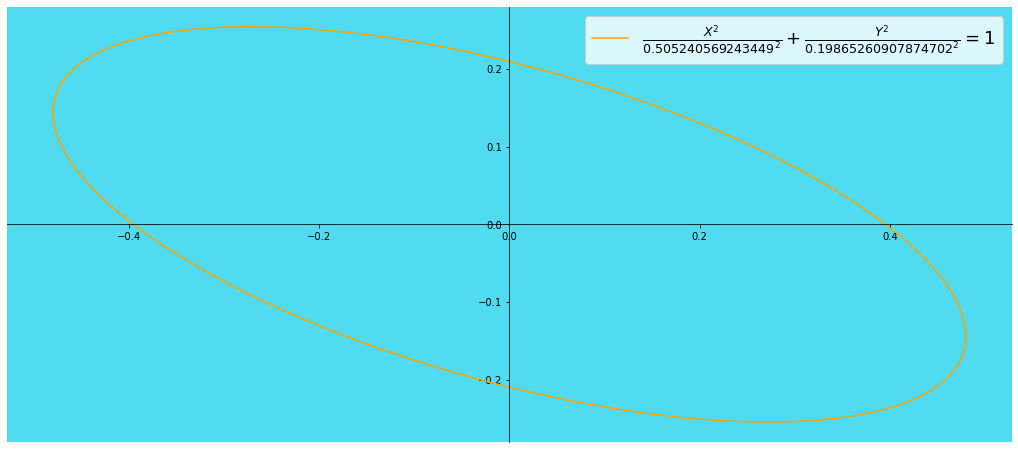

In [96]:
u,k = 2, scipy.stats.chi2.ppf(0.99,2)
cx = np.matrix([[0.025,0.0075],
               [0.0075,0.007]])

lambda1 = (cx[0,0] + cx[1,1])*0.5 + 0.5 * np.sqrt((cx[0,0]-cx[1,1])**2+ 4 *cx[0,1]**2)
lambda2 = (cx[0,0] + cx[1,1])*0.5 - 0.5 * np.sqrt((cx[0,0]-cx[1,1])**2+ 4 * cx[0,1]**2)

theta = 0.5 * np.arctan(2*cx[0,1]/(cx[0,0]-cx[1,1]))

a = np.sqrt(k * lambda1)
b = np.sqrt(k *lambda2)

t = np.linspace(0,360,36000)
xo = np.matrix([a * np.sin(np.radians(t)),
           b * np.cos(np.radians(t))]).T

c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

fig, ax = plt.subplots(figsize=(18,8),subplot_kw={'facecolor':'#50dbf0'})
ax.plot((xo *R)[:,0],(xo *R)[:,1],"orange",label =r"$\frac{X^2}{0.505240569243449^2} + \frac{Y^2}{0.19865260907874702^2}=1$")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#move
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')


plt.legend(prop={"size":18})
plt.show()